###Approach to the Spam Detector

*   Load the data and Libraries
*   Data Audit
*   Data Preparation
    * Tokenization
    * Lemmatization
    * Removal of Stop Words
    * Lower Case
    * Removal of Special Characters
*   Vectorization
    * TFIDF & CountVectorizer
*   Machine Learning
*   Deep Learning using Keras/TensorFlow

Load Data and Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical


In [ ]:
data = pd.read_csv('/content/spam.csv', encoding = 'latin-1')

In [ ]:
data.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
data = data.iloc[:,:2]

In [ ]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Extract messages text and labels
messages = data['v2'].tolist()
labels = data['v1'].tolist()

Split Data into Train and Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(messages, labels, test_size=0.2, random_state=42)

In [ ]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

4457
1115
4457
1115


Count Vectorizer

In [ ]:
Vectorizer = CountVectorizer()
X_train_vectorized = Vectorizer.fit_transform(X_train)
X_test_vectorized = Vectorizer.transform(X_test)

SKLearn accepts even if y is not encoded, Keras need it to be coded in 0 and 1

In [ ]:
y_train = [1 if label == 'spam' else 0 for label in y_train]
y_test = [1 if label == 'spam' else 0 for label in y_test]

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Declare the model and layers

In [ ]:
X_train_vectorized.shape[1]

7735

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_vectorized.shape[1],)) # Hidden + Input layer
model.add(Dense(64, activation = 'relu')) # HL 2
model.add(Dense(64, activation = 'relu')) # HL 3
model.add(Dense(2, activation='softmax'))# O/p layer


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                495104    
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 503554 (1.92 MB)
Trainable params: 503554 (1.92 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
7735*64 + 64

495104

7735 columns and 64 neurons + 64 biases

In [ ]:
64*64 + 64

4160

2nd layer calculations
64 outputs + 64 biases

Now 3rd layer calculations

In [ ]:
64*2 + 2

130

64 o/ps and 2 neurons

In [ ]:
495104+4160+4160+130

503554

Model Compilation

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Fit the model


In [ ]:
X_train_vectorized.sort_indices()

In [ ]:
history = model.fit(X_train_vectorized, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
140/140 [==============================] - 2s 12ms/step - loss: 4.9743e-06 - accuracy: 1.0000
Epoch 2/10
140/140 [==============================] - 2s 13ms/step - loss: 4.3785e-06 - accuracy: 1.0000
Epoch 3/10
140/140 [==============================] - 2s 12ms/step - loss: 3.8723e-06 - accuracy: 1.0000
Epoch 4/10
140/140 [==============================] - 2s 12ms/step - loss: 3.4366e-06 - accuracy: 1.0000
Epoch 5/10
140/140 [==============================] - 2s 11ms/step - loss: 3.0681e-06 - accuracy: 1.0000
Epoch 6/10
140/140 [==============================] - 2s 13ms/step - loss: 2.7387e-06 - accuracy: 1.0000
Epoch 7/10
140/140 [==============================] - 2s 12ms/step - loss: 2.4488e-06 - accuracy: 1.0000
Epoch 8/10
140/140 [==============================] - 2s 13ms/step - loss: 2.1973e-06 - accuracy: 1.0000
Epoch 9/10
140/140 [==============================] - 2s 12ms/step - loss: 1.9782e-06 - accuracy: 1.0000
Epoch 10/10
140/140 [==============================] - 

In [ ]:
history = model.fit(X_train_vectorized, y_train, epochs = 10, batch_size = 32, validation_data = (X_test_vectorized, y_test))

Epoch 1/10
140/140 [==============================] - 4s 25ms/step - loss: 2.5950e-05 - accuracy: 1.0000 - val_loss: 0.1667 - val_accuracy: 0.9812
Epoch 2/10
140/140 [==============================] - 3s 22ms/step - loss: 2.0923e-05 - accuracy: 1.0000 - val_loss: 0.1699 - val_accuracy: 0.9812
Epoch 3/10
140/140 [==============================] - 3s 22ms/step - loss: 1.7292e-05 - accuracy: 1.0000 - val_loss: 0.1734 - val_accuracy: 0.9812
Epoch 4/10
140/140 [==============================] - 2s 13ms/step - loss: 1.4283e-05 - accuracy: 1.0000 - val_loss: 0.1764 - val_accuracy: 0.9812
Epoch 5/10
140/140 [==============================] - 2s 14ms/step - loss: 1.1997e-05 - accuracy: 1.0000 - val_loss: 0.1788 - val_accuracy: 0.9812
Epoch 6/10
140/140 [==============================] - 1s 9ms/step - loss: 1.0180e-05 - accuracy: 1.0000 - val_loss: 0.1816 - val_accuracy: 0.9812
Epoch 7/10
140/140 [==============================] - 1s 10ms/step - loss: 8.7052e-06 - accuracy: 1.0000 - val_loss: 0.

In [ ]:
4457/32

139.28125

So each batch contains 140 rounded rows

In [ ]:
(history.history['loss'])

[4.9742507144401316e-06,
 4.378489393275231e-06,
 3.872332854371052e-06,
 3.4366119052720023e-06,
 3.0681489988637622e-06,
 2.738713192229625e-06,
 2.448785153319477e-06,
 2.197256208091858e-06,
 1.978215550479945e-06,
 1.7808101802074816e-06]

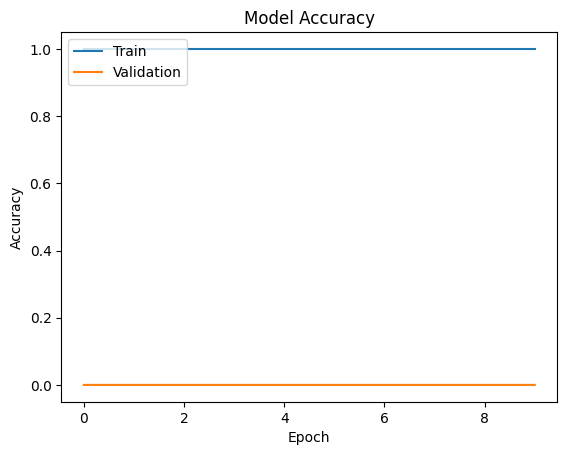

Text(0, 0.5, 'Accuracy')

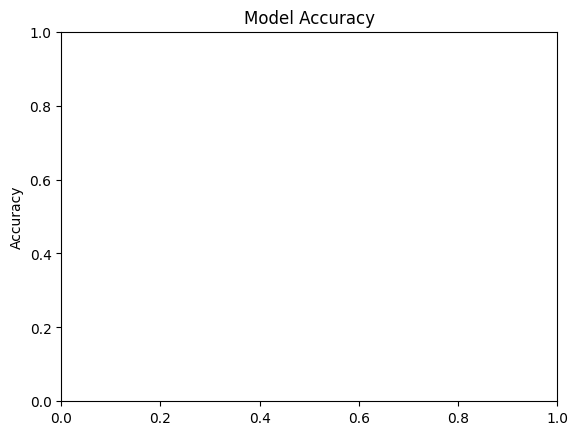

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')

In [ ]:
# make predictions on new data
new_message = "Buy these amazing stocks"
new_message_vectorized = Vectorizer.transform([new_message])
prediction = model.predict(new_message_vectorized)[0][0]
print(prediction)
if prediction > 0.5:
    print("Spam")
else:
    print("Ham")

1/1 [==============================] - 0s 19ms/step
1.0
Spam


In [ ]:
# make predictions on new data
new_message = "Attached your bank statement"
new_message_vectorized = Vectorizer.transform([new_message])
prediction = model.predict(new_message_vectorized)[0][0]
print(prediction)
if prediction > 0.5:
    print("Spam")
else:
    print("Ham")

1/1 [==============================] - 0s 30ms/step
0.99999905
Spam


In [ ]:
# make predictions on new data
new_message = "Understanding Binomial Distribution"
new_message_vectorized = Vectorizer.transform([new_message])
prediction = model.predict(new_message_vectorized)[0][0]
print(prediction)
if prediction > 0.5:
    print("Spam")
else:
    print("Ham")

1/1 [==============================] - 0s 30ms/step
1.0
Spam


In [ ]:
# make predictions on new data
new_message = "Download your ringtone by messaging 55755"
new_message_vectorized = Vectorizer.transform([new_message])
prediction = model.predict(new_message_vectorized)[0][0]
print(prediction)
if prediction > 0.5:
    print("Spam")
else:
    print("Ham")

1/1 [==============================] - 0s 18ms/step
0.401177
Ham
